In [1]:
from scipy.stats import bernoulli, beta, gamma, invgamma, invwishart
from ipywidgets import interact, interactive, fixed, interact_manual
from functools import reduce
from matplotlib import ticker, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import ipywidgets as widgets
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import matplotlib.gridspec as gridspec
import seaborn as sns

np.random.seed(42)

In [2]:
def bern(𝜆):
    data_bern = bernoulli.rvs(size=1000,p=𝜆)
    ax = sns.distplot(data_bern,kde=True,color='crimson',hist_kws={"linewidth": 25,'alpha':1})
    ax.set(xlabel='Bernoulli', ylabel='Frequency')

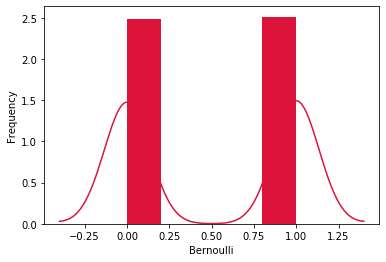

In [3]:
interact(bern, 𝜆=(0.0001,1.0001,0.01));

In [4]:
def Beta(𝛼,𝛽):
    data_beta = beta.rvs(𝛼, 𝛽, size=1000)
    ax = sns.distplot(data_beta,kde=True,color='crimson',hist_kws={"linewidth": 25,'alpha':1})
    ax.set(xlabel='Beta Distribution', ylabel='Probability')

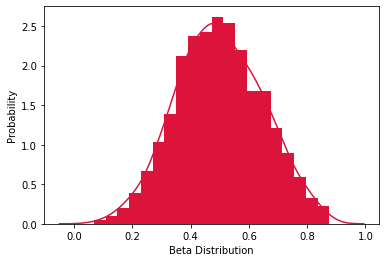

In [5]:
interact(Beta, 𝛼=(0.0000001,10.0000001), 𝛽=(0.0000001,10.0000001));

In [6]:
dataset=sns.load_dataset('tips')
data = dataset['sex']
init_male = data[data=='Male'].count()
total = data.count()
init_female = data[data=='Female'].count()
print("Initially M:",init_male,"F:",init_female,"Total:",total)

Initially M: 157 F: 87 Total: 244


In [7]:
def categorical(i, male, female):
    if i > male:
        difference = i - male
        male = i
        female = female - difference
    else:
        difference = male - i
        male = i
        female = female + difference
    mp = male/total
    fp = female/total
    m = plt.bar('Male',mp, color='g',label='Male')
    f = plt.bar('Female',fp, color='r', label='Female')
    plt.xlabel('Gender')
    plt.ylabel('Probability')
    plt.title('Categorical Data')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
def draw_cat(num_men):
    categorical(num_men,init_male,init_female)

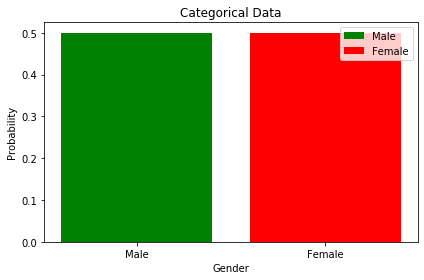

In [8]:
interact(draw_cat, num_men=(0,244,1));

In [13]:
_corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
_triangle = tri.Triangulation(_corners[:, 0], _corners[:, 1])
_midpoints = [(_corners[(i + 1) % 3] + _corners[(i + 2) % 3]) / 2.0 for i in range(3)]

def xy2bc(xy, tol=1.e-3):

    s = [(_corners[i] - _midpoints[i]).dot(xy - _midpoints[i]) / 0.75 for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):

        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):

        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1) for (xx, aa)in zip(x, self._alpha)])
    def sample(self, N):

        return np.random.dirichlet(self._alpha, N)

def draw_pdf_contours(dist, border=False, nlevels=200, subdiv=8, **kwargs):


    refiner = tri.UniformTriRefiner(_triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    if border is True:
#         plt.hold(1)
        plt.triplot(_triangle, linewidth=1)

def plot_points(X, barycentric=True, border=True, **kwargs):

    if barycentric is True:
        X = X.dot(_corners)
    plt.plot(X[:, 0], X[:, 1], 'k.', ms=1, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    if border is True:
#         plt.hold(1)
        plt.triplot(_triangle, linewidth=1)


def draw_dirichlet(a,b,c):
    alphas= [a,b,c]
    dist = Dirichlet(alphas)
    draw_pdf_contours(dist)
    title = r'$\alpha$ = (%.3f, %.3f, %.3f)' % tuple(alphas)
    plt.title(title, fontdict={'fontsize': 8})
    plot_points(dist.sample(5000))


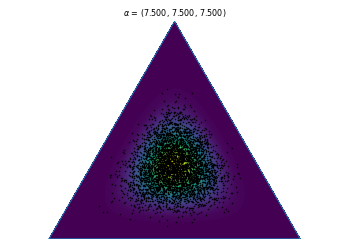

In [10]:
interact(draw_dirichlet, a=(0.0000001,15.0000001), b=(0.0000001,15.0000001),c=(0.0000001,15.0000001));

In [14]:
def univariate_normal(𝜇, var):
    value = np.random.normal(loc=𝜇,scale=var,size=1000)
    sns.distplot(value)
    plt.xlabel("Value")
    plt.ylabel("Probability")
    plt.title("Univariate Normal Distribution")

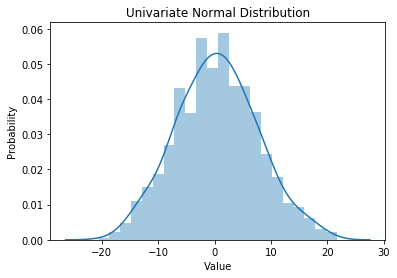

In [15]:
interact(univariate_normal, 𝜇=(-100,100), var=(0.0000001,15.0000001));

In [16]:
# mesh
def inverse_gamma(𝛼,𝛽):
    x = np.linspace(invgamma.ppf(0.01, 𝛼),invgamma.ppf(0.99, 𝛼), 100)
    plt.plot(x, invgamma.pdf(x=x,a=𝛼, scale=𝛽),'r-', lw=5, alpha=0.6, label='invgamma pdf')
    plt.title("Normal-scaled inverse gamma distribution")
    plt.xlabel("Mean")
    plt.ylabel("Standard Deviation")
    plt.show()

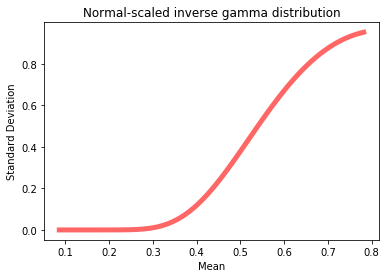

In [17]:
interact(inverse_gamma,𝛼=(0.0001,10.0001),𝛽=(0.0001,10.0001));

In [19]:
def inverse_gamma(a,b,g,d,var,mean):
    first_term  = math.sqrt(g)/math.sqrt(var)
    
    sec_term = math.pow(b,a)/gamma.rvs(a)
    
    third_term = math.pow((1/var),(a+1))
    
    fourth_term = -((2*b + g*math.pow((d-mean),2))/(2*var))
    
    return first_term * sec_term * third_term * math.exp(fourth_term)

x = []
y= []
val = []
for i in range(-5,5):
    for j in range(1,5):
        x.append(i)
        y.append(j)
        val.append(inverse_gamma(1,1,1,0,j,i))

In [20]:
def multivariate_normal(x, d, mean, covariance):
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

In [21]:
def generate_surface(mean, covariance, d):
    nb_of_x = 100 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)


def draw_multi(mean):
    # subplot
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
    d = 2  # number of dimensions

    # Plot of independent Normals
    bivariate_mean = np.matrix([[mean], [mean]])  # Mean
    bivariate_covariance = np.matrix([
        [1., 0.], 
        [0., 1.]])  # Covariance
    x1, x2, p = generate_surface(
        bivariate_mean, bivariate_covariance, d)
    # Plot bivariate distribution
    con = ax1.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
    ax1.set_xlabel('$x_1$', fontsize=13)
    ax1.set_ylabel('$x_2$', fontsize=13)
    ax1.axis([-2.5, 2.5, -2.5, 2.5])
    ax1.set_aspect('equal')
    ax1.set_title('Independent variables', fontsize=12)

    # Plot of correlated Normals
    bivariate_mean = np.matrix([[0.], [mean]])  # Mean
    bivariate_covariance = np.matrix([
        [1., 0.8], 
        [0.8, 1.]])  # Covariance
    x1, x2, p = generate_surface(
        bivariate_mean, bivariate_covariance, d)
    # Plot bivariate distribution
    con = ax2.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
    ax2.set_xlabel('$x_1$', fontsize=13)
    ax2.set_ylabel('$x_2$', fontsize=13)
    ax2.axis([-2.5, 2.5, -1.5, 3.5])
    ax2.set_aspect('equal')
    ax2.set_title('Correlated variables', fontsize=12)

    # Add colorbar and title
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(con, cax=cbar_ax)
    cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
    plt.suptitle('Bivariate normal distributions', fontsize=13, y=0.95)
    plt.show()

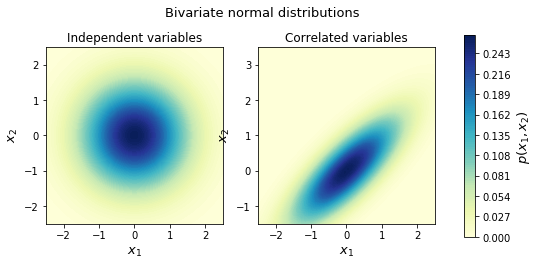

In [22]:
# use a,b,c and in the covariance matrix and then that should rotate and flex out 
interact(draw_multi,mean=(-2,2));

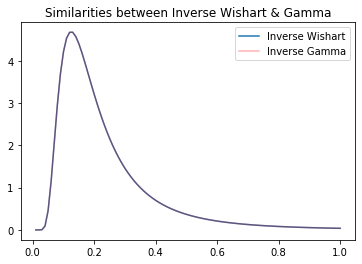

The first three data points of each
Wishart: [1.20546865e-15 5.42497807e-06 4.45813929e-03]
Gamma: [1.20546865e-15 5.42497807e-06 4.45813929e-03]


In [23]:
x = np.linspace(0.01, 1, 100)
iw = invwishart.pdf(x, df=6, scale=1)
ig = invgamma.pdf(x, 6/2., scale=1./2)
plt.plot(x, iw,label="Inverse Wishart")
plt.plot(x,ig,'-r',label="Inverse Gamma",alpha=0.3)
plt.legend()
plt.title("Similarities between Inverse Wishart & Gamma")
plt.show()
print("The first three data points of each")
print("Wishart:",iw[:3])
print("Gamma:",ig[:3])